In [1]:
import numpy as np

In [2]:
data=np.loadtxt('https://files.codingninjas.in/data-6984.csv',delimiter=',')
x=data[:,0].reshape(-1,1)
y=data[:,1]

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(70, 1)
(70,)
(30, 1)
(30,)


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
alg1=LinearRegression()

In [8]:
alg1.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred=alg1.predict(x_test)

In [10]:
m=alg1.coef_[0]
m

1.212114677203583

In [11]:
c=alg1.intercept_
c

12.581630382942635

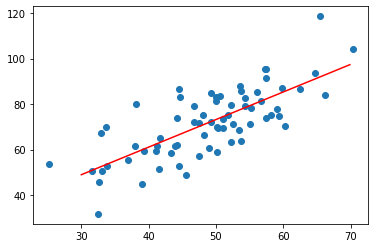

In [13]:
import matplotlib.pyplot as plt
X=np.arange(30,70,0.1)
Y=m*X+c
plt.plot(X,Y,color='r')
x_train=x_train.reshape(70)
plt.scatter(x_train,y_train)
plt.show()

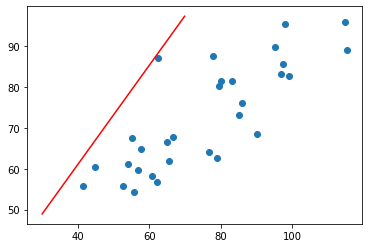

In [14]:
import matplotlib.pyplot as plt
X=np.arange(30,70,0.1)
Y=m*X+c
plt.plot(X,Y,color='r')
x_train=x_train.reshape(70)
plt.scatter(y_test,y_pred)
plt.show()

In [15]:
alg1.score(x_train.reshape(-1,1),y_train)

0.5624247632026611

In [16]:
y_test.shape

(30,)

In [17]:
y_pred.shape

(30,)

In [18]:
alg1.score(x_test,y_test)

0.6238548254113537

## Using handwritten functions

In [19]:
import numpy as np

In [20]:
data=np.loadtxt('https://files.codingninjas.in/data-6984.csv',delimiter=',')
x=data[:,0]
y=data[:,1]
x,y

(array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
        55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
        45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
        48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754,
        66.18981661, 65.41605175, 47.48120861, 41.57564262, 51.84518691,
        59.37082201, 57.31000344, 63.61556125, 46.73761941, 50.55676015,
        52.22399609, 35.56783005, 42.43647694, 58.16454011, 57.50444762,
        45.44053073, 61.89622268, 33.09383174, 36.43600951, 37.67565486,
        44.55560838, 43.31828263, 50.07314563, 43.87061265, 62.99748075,
        32.66904376, 40.16689901, 53.57507753, 33.86421497, 64.70713867,
        38.11982403, 44.50253806, 40.59953838, 41.72067636, 51.08863468,
        55.0780959 , 41.37772653, 62.49469743, 49.20388754, 41.10268519,
        41.18201611, 50.18638949, 52.37844622, 50.13548549, 33.64470601,
        39.55790122, 56.13038882, 57.36205213, 60.2

In [21]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=.27,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(73,)
(27,)
(73,)
(27,)


In [26]:
def fit(x_train,y_train):
    num=(x_train*y_train).mean()-x_train.mean()*y_train.mean()
    dnum=(x_train**2).mean()-x_train.mean()**2
    m=num/dnum
    c=y_train.mean()-m*x_train.mean()
    return m,c

In [30]:
def predict(x,m,c):
    return m*x+c
def score(y_truth,y_pred):
    u=((y_truth-y_pred)**2).sum()
    v=((y_truth-y_truth.mean())**2).sum()
    return 1-u/v

In [33]:
def cost(x,y,m,c):
    return ((y-m*x+c)**2).mean()

In [37]:
m,c=fit(x_train,y_train)
#test_prediction data

y_test_pred=predict(x_test,m,c)
print('test_ score',score(y_test,y_test_pred))
#train data
y_train_pred=predict(x_train,m,c)
print('train score',score(y_train,y_train_pred))
print(m,c)
print('cost:',cost(x_train,y_train,m,c))
print('cost:',cost(x_train,y_train,m+1,c))#checking the cost is minimum we can found or not just adding the +1  into m

test_ score 0.43315143197492234
train score 0.6446200750283668
1.3372971376602987 7.22285534081621
cost: 312.6882424329631
cost: 1381.3390355828308


## checking the value of handwritten function and declared function 

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
alg1=LinearRegression()

In [41]:
x_train=x_train.reshape(73,1)

In [42]:
alg1.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred=alg1.predict(x_test.reshape(27,1))

In [45]:
m=alg1.coef_[0]
m

1.337297137660296

In [46]:
c=alg1.intercept_
c

7.222855340816338

In [47]:
alg1.score(x_train.reshape(-1,1),y_train)

0.6446200750283668

In [49]:
alg1.score(x_test.reshape(-1,1),y_test)

0.43315143197492256

# Gradiant Descent code 

In [18]:
import numpy as np

In [5]:
import numpy as np
data = np.loadtxt("https://files.codingninjas.in/data-6984.csv", delimiter=",")
training_data = data[:70,:]
training_data.shape

(70, 2)

In [14]:
def step_gradient(points, learning_rate, m , c):
    m_slope = 0
    c_slope = 0
    M = len(points)
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        m_slope += (-2/M)* (y - m * x - c)*x
        c_slope += (-2/M)* (y - m * x - c)
    new_m = m - learning_rate * m_slope
    new_c = c - learning_rate * c_slope
    return new_m, new_c

In [15]:
# The Gradient Descent Function
def gd(points, learning_rate, num_iterations):
    m = 0       # Intial random value taken as 0
    c = 0       # Intial random value taken as 0
    for i in range(num_iterations):
        m, c = step_gradient(points, learning_rate, m , c)
        print(i, " Cost: ", cost(points, m, c))
    return m, c

In [16]:
def cost(points, m, c):
    total_cost = 0
    M = len(points)
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (1/M)*((y - m*x - c)**2)
    return total_cost

In [17]:
def run():
    learning_rate = 0.0001
    num_iterations = 100
    m, c = gd(training_data, learning_rate, num_iterations)
    print("Final m :", m)
    print("Final c :", c)
    return m,c

In [18]:
run()

0  Cost:  1461.4044104341087
1  Cost:  460.8670268567474
2  Cost:  205.4870778024464
3  Cost:  140.30318108579826
4  Cost:  123.66545280139864
5  Cost:  119.41878332450108
6  Cost:  118.33484209854512
7  Cost:  118.05816441204072
8  Cost:  117.98753491264765
9  Cost:  117.96949772470519
10  Cost:  117.96488434447647
11  Cost:  117.96369729432573
12  Cost:  117.96338479030575
13  Cost:  117.96329550799736
14  Cost:  117.9632632015475
15  Cost:  117.9632454379033
16  Cost:  117.96323138633423
17  Cost:  117.96321828237488
18  Cost:  117.96320542041524
19  Cost:  117.96319262035338
20  Cost:  117.9631798362198
21  Cost:  117.96316705628094
22  Cost:  117.96315427754192
23  Cost:  117.96314149923846
24  Cost:  117.96312872117527
25  Cost:  117.96311594330255
26  Cost:  117.9631031656078
27  Cost:  117.9630903880875
28  Cost:  117.96307761074107
29  Cost:  117.96306483356811
30  Cost:  117.96305205656859
31  Cost:  117.96303927974257
32  Cost:  117.96302650309
33  Cost:  117.96301372661085


(1.458255777804894, 0.032397159787702676)

In [6]:
import numpy as np

In [7]:
def step_gradiant(points,learning_rate,m ,c):
    c_slope=0
    m_slope=0
    N=len(points)
    for i in range(N):
        x=points[i,0]
        y=points[i,1]
        m_slope += (-2/N) * (y - m * x -c)*x
        c_slope +=(-2/N) * (y- m* x -c)
    new_m=m-learning_rate*m_slope
    new_c=c-learning_rate*c_slope
    return new_m ,new_c

In [8]:
def cost(points, m, c):
    total_cost = 0
    N = len(points)
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (1/N)*((y - m*x - c)**2)
    return total_cost

In [9]:
def gd(points,learning_rate,num_iteration):
    m=0
    c=0
    for i in range(num_iteration):
        m,c=step_gradiant(points,learning_rate, m , c)
        print('cost',cost(points,m,c))
    return m,c

In [10]:
def run():
    data=np.loadtxt('https://files.codingninjas.in/data-6984.csv',delimiter=',')
    learning_rate=0.0001
    num_iteration=100
    m,c=gd(data,learning_rate,num_iteration)
    print(m,c)

In [11]:
run()

cost 1484.5865574086486
cost 457.8542575737672
cost 199.5099857255389
cost 134.50591058200533
cost 118.1496934223995
cost 114.0341490603815
cost 112.99857731713657
cost 112.73798187568467
cost 112.6723843590911
cost 112.65585181499745
cost 112.65166489759581
cost 112.6505843615011
cost 112.65028544701502
cost 112.65018320293967
cost 112.650130445072
cost 112.65009013922885
cost 112.6500529669463
cost 112.65001658353178
cost 112.64998039901865
cost 112.64994426496071
cost 112.64990814400622
cost 112.64987202675677
cost 112.64983591084761
cost 112.64979979568368
cost 112.64976368111523
cost 112.64972756710469
cost 112.64969145364236
cost 112.64965534072611
cost 112.64961922835512
cost 112.64958311652944
cost 112.64954700524868
cost 112.64951089451318
cost 112.64947478432279
cost 112.64943867467744
cost 112.64940256557728
cost 112.64936645702221
cost 112.64933034901203
cost 112.64929424154704
cost 112.64925813462712
cost 112.6492220282522
cost 112.64918592242235
cost 112.64914981713754
co

## feature scaling

In [1]:
import numpy as np
from sklearn import preprocessing

In [40]:
X=np.random.randint(0,2,9).reshape(3,3)

In [41]:
X

array([[0, 1, 0],
       [1, 0, 0],
       [1, 1, 1]])

In [42]:
X_scaled=preprocessing.scale(X)

In [44]:
X_scaled.mean(axis=1)

array([-0.47140452, -0.47140452,  0.94280904])

In [45]:
X

array([[0, 1, 0],
       [1, 0, 0],
       [1, 1, 1]])

In [46]:
X_scaler=preprocessing.StandardScaler()

In [47]:
X_scaler.fit(X)

StandardScaler()

In [48]:
X_scaler.transform(X)

array([[-1.41421356,  0.70710678, -0.70710678],
       [ 0.70710678, -1.41421356, -0.70710678],
       [ 0.70710678,  0.70710678,  1.41421356]])

In [49]:
#adding new data to the scaler
X_test=[[0,1,0]]
X_scaler.transform(X_test)

array([[-1.41421356,  0.70710678, -0.70710678]])

## 2nd practice Linear Regression

In [14]:
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

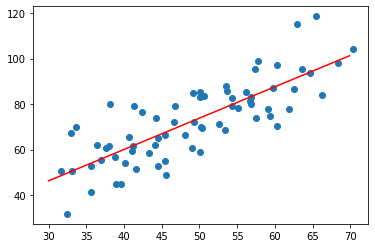

In [15]:
data=np.loadtxt('https://files.codingninjas.in/data-6984.csv',delimiter=',')
x=data[:,0].reshape(-1,1)
y=data[:,1].reshape(-1,1)
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=0,test_size=0.3)
alg1=LinearRegression()
alg1.fit(x_train,y_train)
y_pred=alg1.predict(x_test)
m=alg1.coef_[0]
c=alg1.intercept_

X=np.arange(30,70,0.1)
Y=m*X+c
plt.plot(X,Y,color='r')
x_train=x_train.reshape(70)
plt.scatter(x_train,y_train)
plt.show()

# using handwritten function

In [3]:
import numpy as np
from sklearn import model_selection
data=np.loadtxt('https://files.codingninjas.in/data-6984.csv',delimiter=',')
x=data[:,0]
y=data[:,1]
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=0,test_size=0.3)

# calling out fit function
def fit(x_train,y_train):
    num=(x_train*y_train).mean()-x_train.mean()*y_train.mean()
    dnum=(x_train**2).mean()-x_train.mean()**2
    m=num/dnum
    c=y_train.mean()-m*x_train.mean()
    return m,c
#calling out prediction function
def predict(x,m,c):
    return m*x+c

# score function
def score(y_truth,y_pred):
    u=((y_truth-y_pred)**2).sum()
    v=((y_truth-y_truth.mean())**2).sum()
    return 1-u/v
#cost function
def cost(y,x,m,c):
    return((y-m*x+c)**2).mean()

m,c=fit(x_train,y_train)
#test_prediction data

y_test_pred=predict(x_test,m,c)
print('test_ score',score(y_test,y_test_pred))
#train data
y_train_pred=predict(x_train,m,c)
print('train score',score(y_train,y_train_pred))
print(m,c)
print('cost:',cost(x_train,y_train,m,c))
print('cost:',cost(x_train,y_train,m+0.1,c))

test_ score 0.4769365552229231
train score 0.638860686598496
1.3780014623662094 4.902019316324655
cost: 2392.9158490363366
cost: 3168.882503145479


In [14]:
import numpy as np

def step_gradiant(points,learning_rate,m,c):
    m_slope=0
    c_slope=0
    M=len(points)
    for i in range(M):
        x=points[i,0]
        y=points[i,1]
        m_slope +=(-2/M)*(y-m*x-c)*x
        c_slope +=(-2/M)*(y-m*x-c)
    new_m=m-learning_rate*m_slope
    new_c=c-learning_rate*c_slope
    return new_m,new_c

def gd(points,learning_rate,number_iteration):
    m=0
    c=0
    for i in range(number_iteration):
        m,c=step_gradiant(points,learning_rate,m,c)
        print(i,'cost:',cost(points,m,c))
    return m,c

def cost(points,m,c):
    M=len(points)
    total_cost=0
    for i in range(M):
        x=points[i,0]
        y=points[i,1]
        total_cost +=(1/M)*((y-m*x-c)**2).sum()
    return total_cost

def run():
    
    data=np.loadtxt('https://files.codingninjas.in/data-6984.csv',delimiter=',')
    learning_rate=0.0001
    number_iteration=100
    m,c= gd(data,learning_rate,number_iteration)
    print('final m:',m)
    print ('final c',c)
run()

0 cost: 1484.5865574086486
1 cost: 457.8542575737672
2 cost: 199.5099857255389
3 cost: 134.50591058200533
4 cost: 118.1496934223995
5 cost: 114.0341490603815
6 cost: 112.99857731713657
7 cost: 112.73798187568467
8 cost: 112.6723843590911
9 cost: 112.65585181499745
10 cost: 112.65166489759581
11 cost: 112.6505843615011
12 cost: 112.65028544701502
13 cost: 112.65018320293967
14 cost: 112.650130445072
15 cost: 112.65009013922885
16 cost: 112.6500529669463
17 cost: 112.65001658353178
18 cost: 112.64998039901865
19 cost: 112.64994426496071
20 cost: 112.64990814400622
21 cost: 112.64987202675677
22 cost: 112.64983591084761
23 cost: 112.64979979568368
24 cost: 112.64976368111523
25 cost: 112.64972756710469
26 cost: 112.64969145364236
27 cost: 112.64965534072611
28 cost: 112.64961922835512
29 cost: 112.64958311652944
30 cost: 112.64954700524868
31 cost: 112.64951089451318
32 cost: 112.64947478432279
33 cost: 112.64943867467744
34 cost: 112.64940256557728
35 cost: 112.64936645702221
36 cost: 11

# Project using Gradiant descent Using Boston data

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
data=pd.read_csv('0000000000002417_training_boston_x_y_train-Copy1.csv',delimiter=',')
data.head()

,# CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,-0.407850,-0.487722,-1.266023,-0.272599,-0.576134,1.239974,0.840122,-0.520264,-0.752922,-1.278354,-0.303094,0.410571,-1.097990,37.9
1,-0.407374,-0.487722,0.247057,-0.272599,-1.016689,0.001946,-0.838337,0.336351,-0.523001,-0.060801,0.113032,0.291169,-0.520474,21.4
2,0.125179,-0.487722,1.015999,-0.272599,1.367490,-0.439699,0.687212,-0.577309,1.661245,1.530926,0.806576,-3.795795,0.891076,12.7
3,0.028304,-0.487722,1.015999,-0.272599,1.859875,-0.047918,0.801005,-0.712836,1.661245,1.530926,0.806576,-0.066050,0.215438,19.9
4,-0.412408,-0.487722,-0.969827,-0.272599,-0.913029,-0.384137,-0.834781,0.300508,-0.752922,-0.957633,0.020560,0.431074,0.029007,22.5


In [3]:
Y=data[' Y']
del data[' Y']

In [4]:
data.head()

,# CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.407850,-0.487722,-1.266023,-0.272599,-0.576134,1.239974,0.840122,-0.520264,-0.752922,-1.278354,-0.303094,0.410571,-1.097990
1,-0.407374,-0.487722,0.247057,-0.272599,-1.016689,0.001946,-0.838337,0.336351,-0.523001,-0.060801,0.113032,0.291169,-0.520474
2,0.125179,-0.487722,1.015999,-0.272599,1.367490,-0.439699,0.687212,-0.577309,1.661245,1.530926,0.806576,-3.795795,0.891076
3,0.028304,-0.487722,1.015999,-0.272599,1.859875,-0.047918,0.801005,-0.712836,1.661245,1.530926,0.806576,-0.066050,0.215438
4,-0.412408,-0.487722,-0.969827,-0.272599,-0.913029,-0.384137,-0.834781,0.300508,-0.752922,-0.957633,0.020560,0.431074,0.029007


In [5]:
data_scaled=preprocessing.scale(data)
data_scaled=pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.400981,-0.490427,-1.281492,-0.287849,-0.605917,1.207950,0.814838,-0.505604,-0.784522,-1.297963,-0.322642,0.420280,-1.100955
1,-0.400534,-0.490427,0.207535,-0.287849,-1.047205,-0.030261,-0.891071,0.328940,-0.557982,-0.102675,0.093911,0.302580,-0.531433
2,0.099008,-0.490427,0.964253,-0.287849,1.340946,-0.471970,0.659427,-0.561179,1.594148,1.459945,0.788166,-3.726145,0.860578
3,0.008138,-0.490427,0.964253,-0.287849,1.834151,-0.080131,0.775082,-0.693215,1.594148,1.459945,0.788166,-0.049549,0.194293
4,-0.405257,-0.490427,-0.990005,-0.287849,-0.943373,-0.416400,-0.887456,0.294021,-0.784522,-0.983107,0.001343,0.440491,0.010442


In [6]:
lc=np.ones(data_scaled.shape[0])
lc.shape
data_scaled['lc']=lc
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,lc
0,-0.400981,-0.490427,-1.281492,-0.287849,-0.605917,1.207950,0.814838,-0.505604,-0.784522,-1.297963,-0.322642,0.420280,-1.100955,1.0
1,-0.400534,-0.490427,0.207535,-0.287849,-1.047205,-0.030261,-0.891071,0.328940,-0.557982,-0.102675,0.093911,0.302580,-0.531433,1.0
2,0.099008,-0.490427,0.964253,-0.287849,1.340946,-0.471970,0.659427,-0.561179,1.594148,1.459945,0.788166,-3.726145,0.860578,1.0
3,0.008138,-0.490427,0.964253,-0.287849,1.834151,-0.080131,0.775082,-0.693215,1.594148,1.459945,0.788166,-0.049549,0.194293,1.0
4,-0.405257,-0.490427,-0.990005,-0.287849,-0.943373,-0.416400,-0.887456,0.294021,-0.784522,-0.983107,0.001343,0.440491,0.010442,1.0


In [7]:
points=np.array(data_scaled)
points.shape

(379, 14)

In [19]:
def step_gd(points,learning_rate,m):
    M=len(points)
    m_slope=np.zeros(14)
    for i in range(M):
        x=points[i]
        y=Y[i]
        for j in range(14):
            m_slope[j] += (-2/M)*(y-(m*x).sum())*x[j]
    for j in range(14):
        m[j] += m[j] - m_slope[j]*learning_rate
    return m

In [20]:
def gd(points,learning_rate,number_iteration):
    m=np.zeros(14)
    for i in range(number_iteration):
        m=step_gd(points,learning_rate,m)
        print(i,'cost:',cost(points,m))
    return m

In [21]:
def cost(points,m):
    total_cost=0
    M=len(points)
    for i in range(M):
        x=points[i]
        y=Y[i]
        total_cost +=(1/M)*((y-(m*x).sum())**2)
    return total_cost

In [22]:
def run():
    learning_rate=0.001
    number_iteration=100
    m = gd(points, learning_rate, number_iteration)
    print(m)
    return m

In [23]:
m=run()

0 cost: 596.1899201459963
1 cost: 590.3788090599924
2 cost: 578.9422075131234
3 cost: 556.7515443744264
4 cost: 514.9701761350445
5 cost: 441.5051241448734
6 cost: 334.19449331655784
7 cost: 275.84450956561284
8 cost: 777.1825622544492
9 cost: 4227.484849564654
10 cost: 20828.25508323885
11 cost: 92486.42725622229
12 cost: 388295.0419822227
13 cost: 1584656.8168087788
14 cost: 6375799.494719463
15 cost: 25470655.26143947
16 cost: 101390272.24911149
17 cost: 402882790.1191717
18 cost: 1599473895.2440233
19 cost: 6347279178.82058
20 cost: 25183068065.534195
21 cost: 99905611045.8291
22 cost: 396329403629.1263
23 cost: 1572245839629.2334
24 cost: 6237186070924.689
25 cost: 24743676742835.285
26 cost: 98163192780502.27
27 cost: 389442060830132.3
28 cost: 1545066580930540.0
29 cost: 6130020613567809.0
30 cost: 2.432132254896031e+16
31 cost: 9.649904825318011e+16
32 cost: 3.828860207372772e+17
33 cost: 1.5192409670988529e+18
34 cost: 6.028295247020782e+18
35 cost: 2.3920656190891885e+19
36 c